In [1]:
from models.stein import *
from models.pve import *
import torch.optim as optim
from data.data_generation import *
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
def plot_empirical(samples, prior):
    # dataset
    X = samples.detach().numpy().reshape(-1)
    X_plot = np.linspace(min(X), max(X), 1000)
    num_bins = 35
    fig, ax = plt.subplots()
    # the histogram of the data
    n, bins, patches = ax.hist(X, num_bins, density=1)

    ax.set_xlabel('PVE')
    ax.set_ylabel('density')

    kde = gaussian_kde(X)
    kde_pdf = kde.evaluate(X_plot)

    prior_pdf = prior.pdf(torch.tensor(X_plot)).numpy()
    ax.plot(X_plot, kde_pdf)
    ax.plot(X_plot, prior_pdf, 'r-')
    ax.set_title('Empirical distribution of PVE')

    ax.legend(('KDE of empirical PVE', 'Prior PVE', 'Empirical PVE'))

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

## 1 Load the data

In [3]:
path_data = 'D:/Work/public_code/data/'
num_random = 0; noise_level = 0.
x, y, x_test, y_test, num_useful, num_feature = data_generating_energy(path_data, num_random, noise_level)

## 2 Learning the scale parameter of Inv-Gamma 

In [4]:
alpha_prior = 5.0; beta_prior = 1.0; prior = BetaPrior(alpha_prior, beta_prior)  # prior pve: Beta(5,1)
eta = 0.1; estimator = SteinGradientEstimator(eta)  # define the stein gradient estimator
learning_rate = 2 * 1e-3;  M = 300 # define learning rate and batch size (M)
num_hidden_nodes = [50, 30] # define the NN architecture
sampler = PVESampler_ARD(x, M, num_hidden_nodes)  # define the sampler of implicity distribution

###  2.1 Empirical model PVE before stein gradient optimization

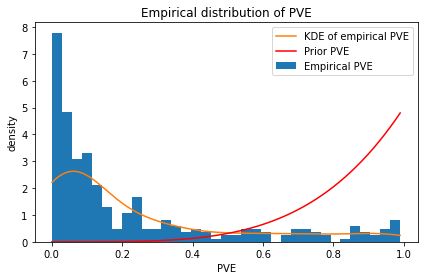

In [5]:
samples = sampler()
plot_empirical(samples, prior)

###  2.2 Stein gradient optimization

In [6]:
parameters = sampler.parameters()
optimizer = optim.SGD(parameters, lr=learning_rate)
num_epoch = 200;
minimize_kldivergence(sampler, prior, optimizer, estimator, num_epoch)

EPOCH 0: KL: 7.9624.
EPOCH 10: KL: 2.5908.
EPOCH 20: KL: 0.4888.
EPOCH 30: KL: -0.0675.
EPOCH 40: KL: -0.7887.
EPOCH 50: KL: -1.0903.
EPOCH 60: KL: -1.1391.
EPOCH 70: KL: -1.3629.
EPOCH 80: KL: -1.4885.
EPOCH 90: KL: -1.6180.
EPOCH 100: KL: -1.6276.
EPOCH 110: KL: -1.5569.
EPOCH 120: KL: -1.4591.
EPOCH 130: KL: -1.5019.
EPOCH 140: KL: -1.5072.
EPOCH 150: KL: -1.4087.
EPOCH 160: KL: -1.5598.
EPOCH 170: KL: -1.5619.
EPOCH 180: KL: -1.5348.
EPOCH 190: KL: -1.5180.


array([0.49711326], dtype=float32)

###  2.3 Empirical model PVE after stein gradient optimization

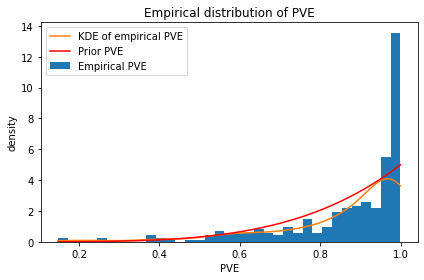

In [7]:
samples = sampler()
plot_empirical(samples, prior)

## 3 Learning the scale parameter of Gaussian

In [8]:
alpha_prior = 5.0; beta_prior = 1.0; prior = BetaPrior(alpha_prior, beta_prior)  # prior pve: Beta(5,1)
eta = 0.1; estimator = SteinGradientEstimator(eta)  # define the stein gradient estimator
learning_rate = 2 * 1e-3;  M = 300 # define learning rate and batch size (M)
num_hidden_nodes = [50, 30] # define the NN architecture
sampler = PVESampler_Gaussian(x, M, num_hidden_nodes)  # define the sampler of implicity distribution

###  3.1 Empirical model PVE before stein gradient optimization

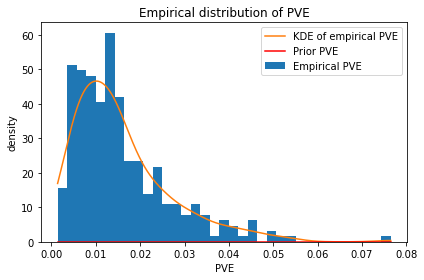

In [9]:
samples = sampler()
plot_empirical(samples, prior)

###  3.2 Stein gradient optimization

In [10]:
parameters = sampler.parameters()
optimizer = optim.SGD(parameters, lr=learning_rate)
num_epoch = 200;
minimize_kldivergence(sampler, prior, optimizer, estimator, num_epoch)

EPOCH 0: KL: 15.0156.
EPOCH 10: KL: 10.0266.
EPOCH 20: KL: 5.7118.
EPOCH 30: KL: 2.9386.
EPOCH 40: KL: 1.0649.
EPOCH 50: KL: 0.2446.
EPOCH 60: KL: -0.3147.
EPOCH 70: KL: -0.8196.
EPOCH 80: KL: -1.0028.
EPOCH 90: KL: -1.2225.
EPOCH 100: KL: -1.3380.
EPOCH 110: KL: -1.3010.
EPOCH 120: KL: -1.5894.
EPOCH 130: KL: -1.5194.
EPOCH 140: KL: -1.5700.
EPOCH 150: KL: -1.6304.
EPOCH 160: KL: -1.6012.
EPOCH 170: KL: -1.6959.
EPOCH 180: KL: -1.6811.
EPOCH 190: KL: -1.6448.


array([0.6053708], dtype=float32)

###  3.3 Empirical model PVE after stein gradient optimization

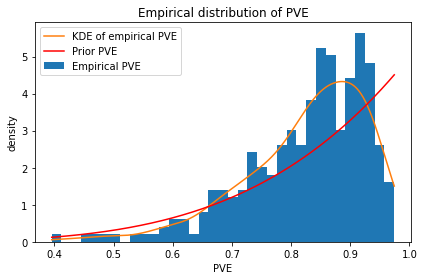

In [11]:
samples = sampler()
plot_empirical(samples, prior)